# NFL Play by Play (2009-2017) Exercise

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer

nfl = pd.read_csv('../data/external/NFL Play by Play 2009-2017 (v4).csv', low_memory=False)

## Basic info on the `NFL Play by Play` dataframe

In [44]:
pd.options.display.max_columns = 150
nfl.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,None,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,None,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,None,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [8]:
print("Shape:", nfl.shape)
total = np.product(nfl.shape)
print("Number of overall data:", total)

Shape: (407688, 102)
Number of overall data: 41584176


In [84]:
nfl.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,4.076880e+05,407688.000000,407688.000000,346534.000000,407688.000000,407464.000000,407244.000000,406848.000000,406848.000000,407688.000000,407688.000000,406848.000000,378877.000000,407688.0,407688.000000,407688.000000,407688.000000,407688.000000,407688.000000,407688.000000,407688.000000,407688.000000,407688.000000,407688.000000,407688.000000,407688.000000,8948.000000,407688.000000,407688.000000,407688.000000,407688.000000,407688.000000,380784.000000,380784.000000,382700.000000,380784.000000,407688.000000,407688.000000,407688.000000,407688.000000,407688.000000,407688.000000,407512.000000,407512.000000,407512.000000,407512.000000,407512.000000,407512.000000,407512.000000,407688.000000,407688.000000,407512.000000,407319.000000,159294.000000,159190.000000,382734.000000,382734.000000,381101.000000,381101.000000,382679.000000,402147.000000,159187.000000,158926.000000,407688.000000
mean,2.013158e+09,12.316158,2.577412,2.002476,7.374200,1695.268944,20.576762,28.488327,48.644081,7.309403,25.945517,0.049134,0.290509,1.0,4.994221,0.071844,0.029069,0.000388,0.001359,0.412624,3.264006,1.252598,0.053077,0.011099,0.296381,0.248418,37.465132,0.014158,0.027195,0.008372,0.072357,0.613673,10.201424,11.414484,-1.186590,7.783541,0.041215,2.521239,2.540479,2.517222,2.520118,2.496367,0.127816,0.094614,0.002495,0.139973,0.243906,0.002634,0.295940,0.024072,0.000703,1.565415,0.019116,0.524818,-0.386086,0.534488,0.465965,0.534791,0.465613,0.501320,0.002099,0.015135,-0.010480,2013.018985
std,2.572839e+06,7.149527,1.129750,1.006353,4.642388,1062.801012,17.969326,12.946471,25.070416,4.869987,24.862079,0.216148,0.453998,0.0,9.102092,0.258230,0.168000,0.019683,0.036838,0.492307,7.511569,4.193132,0.224188,0.104766,0.456662,0.432096,10.282682,0.118142,0.162651,0.091113,0.259078,2.621540,9.432067,9.910753,10.741756,7.453598,0.198788,0.778066,0.760419,0.778348,0.780151,0.797917,0.199682,0.071990,0.003443,0.110466,0.158997,0.001465,0.167845,0.151022,0.018227,1.748440,1.328980,1.394159,1.972715,0.285574,0.285629,0.287818,0.287867,0.287445,0.045363,0.056490,0.068139,2.576962
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,-87.000000,0.000000,0.000000,1.0,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-70.000000,-81.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,0.000000,0.000000,0.000000,-3.000000,-1.000000,-3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.836488,-13.494136,-12.849594,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011101e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,5.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,-7.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.002791,0.034599,0.000104,0.039834,0.152443,0.001883,0.191206,0.000000,0.000000,0.323526,-0.599034,-0.502895,-0.961115,0.325123,0.231411,0.321701,0.227

---
## Non-missing values
#### Number of non-missing data

In [10]:
non_missing_total = nfl.notnull().sum().sum()
print("Number of overall non-missing data:", non_missing_total)

Number of overall non-missing data: 31241301


In [11]:
non_missing_count = nfl.count()
non_missing_count

Date        407688
GameID      407688
Drive       407688
qtr         407688
down        346534
             ...  
Win_Prob    382679
WPA         402147
airWPA      159187
yacWPA      158926
Season      407688
Length: 102, dtype: int64

#### Information on non-missing values

In [12]:
non_missing_info = nfl.info()
non_missing_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 317.3+ MB


---
## Missing values
#### Check if there are any missing values in the data

In [13]:
missing = nfl.isnull()
missing.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,...,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,True,False,True,False,False,True,True,False,False,False,True,False,True,True,False,False,True,True,True,False,False,True,...,False,True,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,True,...,False,True,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,...,False,True,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,True,...,True,True,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,True,True,False,False,True,True,True,False,False,True,...,True,True,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

#### Overall missing data

In [52]:
missing_total = np.count_nonzero(missing)
print("Number of overall missing data:", missing_total)

Number of overall missing data: 10342875


#### Number of missing values in each field

In [17]:
missing_count = missing.sum()
missing_count

Date             0
GameID           0
Drive            0
qtr              0
down         61154
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 102, dtype: int64

#### Ratio of missing values

In [19]:
missing_count / len(nfl)

Date        0.000000
GameID      0.000000
Drive       0.000000
qtr         0.000000
down        0.150002
              ...   
Win_Prob    0.061343
WPA         0.013591
airWPA      0.609537
yacWPA      0.610177
Season      0.000000
Length: 102, dtype: float64

#### Percent of total values missing

In [21]:
missing_percentage_total = (missing_total / total) * 100
print('Percent of total values missing: {:.2f}%'.format(missing_percentage_total))

Percent of total values missing: 24.87%


#### Percent of values missing in each field

In [26]:
missing_percentage = nfl.isnull().mean().round(4) * 100
missing_percentage.sort_values()

Date                 0.00
PassAttempt          0.00
AirYards             0.00
YardsAfterCatch      0.00
QBHit                0.00
                    ...  
RecFumbTeam         98.93
ChalReplayResult    99.17
TwoPointConv        99.85
BlockingPlayer      99.97
DefTwoPoint         99.99
Length: 102, dtype: float64

## Q. For the different types of missing values, infer why you think they are missing? Why could they be missing?

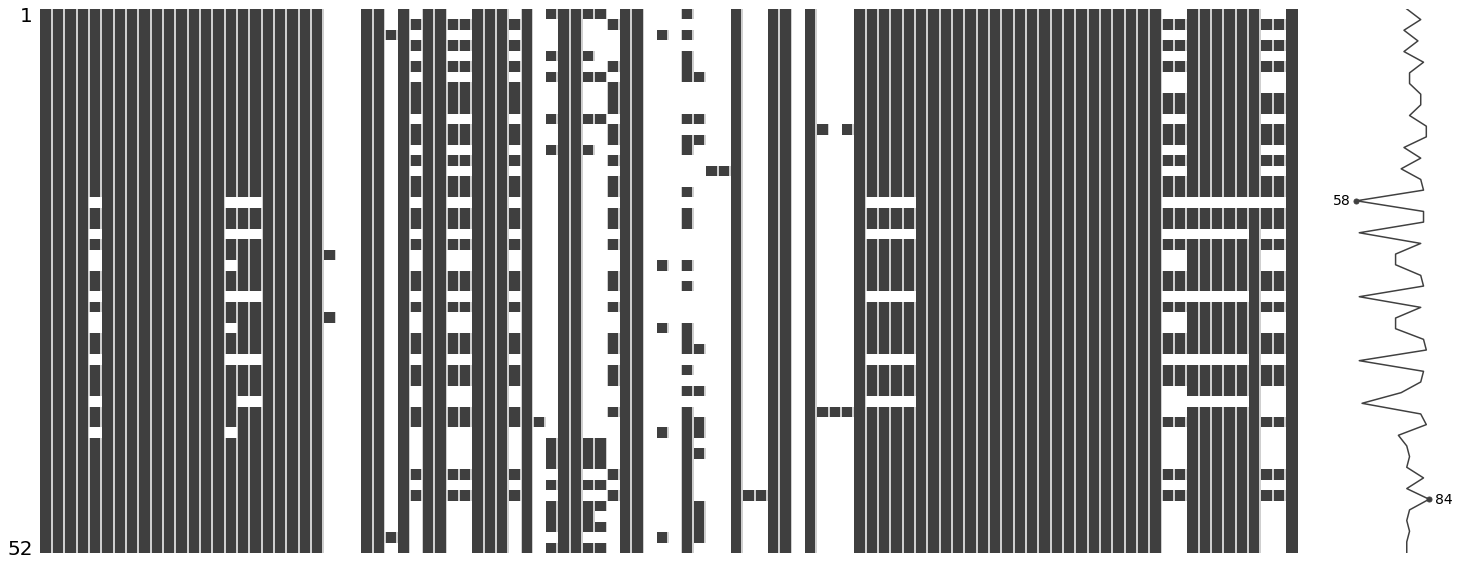

In [70]:
%matplotlib inline
msno.matrix(nfl[50:102])
plt.show()

In [55]:
missing_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64


1. `Down` or `FirstDown`: Seems like when there is a timeout, or a kicker kicks the ball, or a team scores a ball, there is no FirstDown yet. Also at the beginning of game, end of game or when a team goes to the next Downfield, the team gets a new 4 chances to go to the next Downfield. 

2. `ExPointResult`, `TwoPointConv`, `DefTwoPoint`: These do not happen often, rather rarely. Extra points are made only after the team scores touchdown. Therefore, most of the times these are not available.

3. When `PlayType` is `Kickoff`: Only Returner and Tackler1 exists.

4. When `PlayType` is `Pass`: The infomration on `Passer`, `PassAttempt`, `PassLength`, and `PassLocation` exist. If `PassOutcome` is `Complete`, and a receiver received the ball, then the receiver's information is given. If the receiver did not make it to the end, then tackler's information exist, and the `PassOutcome` is `Incomplete`.

5. When `PlayType` is `Run`: `Rusher` and `Tackler`'s information exist. If it was a touchdown, No `Tackler`'s information is given.

6. When `PlayType` is `Sack`: The quarterback is sacked. A `Tackler`'s information is given, and `QBHit` is given.

7. When `PlayType` is `FieldGoal`: The `FieldGoal Result` and `FieldGoal Distance` is given, but one thing that is weird is that it doesn't provide any information on who kicked the ball. 

8. A `PlayType` can be `Pass` or `Run` but `Intercept` may happen. Then the `Interceptor`'s information is given.

10. `PuntResult`: Only happens when a team has only one chance left at the Downfield. This also happens rarely, which creates a lot of missing field.

11. When there is a penalty given, the information on `PenalizedTeam`, `PenaltyType`, `PenalizedPlayer` are provided. 

12. At every `QuarterEnd`, all the information gets resetted. 



In [82]:
nfl[nfl['PosTeamScore'].isnull()]

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
36,2009-09-10,2009091000,8,1,NaN,00:00,0,2700.0,6.0,PIT,44.0,44.0,0,1,0.0,0.0,NaN,NaN,END QUARTER 1,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Quarter End,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PIT,TEN,0,NaN,3,3,3,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2009
68,2009-09-10,2009091000,11,2,NaN,02:00,2,1920.0,8.0,PIT,21.0,21.0,0,12,0.0,NaN,NaN,NaN,Two-Minute Warning,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Two Minute Warning,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PIT,TEN,0,NaN,3,3,3,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.021366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
71,2009-09-10,2009091000,11,2,NaN,01:29,2,1889.0,9.0,PIT,37.0,37.0,0,45,0.0,NaN,NaN,NaN,Timeout #1 by PIT at 01:29.,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Timeout,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PIT,TEN,1,PIT,3,3,3,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2009
77,2009-09-10,2009091000,12,2,NaN,00:54,1,1854.0,15.0,TEN,29.0,29.0,0,57,0.0,NaN,NaN,NaN,Timeout #1 by TEN at 00:54.,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Timeout,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PIT,TEN,1,TEN,3,2,3,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2009
83,2009-09-10,2009091000,13,2,NaN,00:27,1,1827.0,8.0,PIT,32.0,32.0,0,19,0.0,NaN,NaN,NaN,Timeout #2 by PIT at 00:27.,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Timeout,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PIT,TEN,1,PIT,2,2,2,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407630,2017-12-31,2017123101,23,3,NaN,00:00,0,900.0,5.0,CIN,34.0,34.0,0,40,0.0,0.0,NaN,NaN,END QUARTER 3,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Quarter End,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,BAL,CIN,0,NaN,1,3,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,

In [65]:
nfl[nfl['PassLocation'].notnull()]

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,None,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,None,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
6,2009-09-10,2009091000,2,1,2.0,12:40,13,3460.0,36.0,TEN,2.0,98.0,10,4,0.0,0.0,TEN,PIT,(12:40) K.Collins pass short left to A.Hall to...,1,4,0,0,NaN,NaN,NaN,0,0,NaN,Pass,K.Collins,00-0003292,1,Complete,Short,3,1,0,left,0,NaN,NaN,None,0,NaN,NaN,A.Hall,00-0024489,1,NaN,NaN,NaN,T.Polamalu,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.003283,0.264022,0.024132,0.409397,0.116551,0.003305,0.179311,0.0,0.0,-2.094662,-0.179149,-0.343085,0.163935,0.578453,0.421547,0.582881,0.417119,0.421547,-0.004427,-0.010456,0.006029,2009
9,2009-09-10,2009091000,3,1,1.0,11:24,12,3384.0,10.0,TEN,43.0,43.0,10,3,0.0,0.0,PIT,TEN,(11:24) B.Roethlisberger pass short right to M...,1,3,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-2,5,0,right,0,NaN,NaN,None,0,NaN,NaN,M.Wallace,00-0026901,1,NaN,NaN,NaN,W.Hayes,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001494,0.069965,0.000275,0.107951,0.336207,0.003334,0.480774,0.0,0.0,3.414601,-0.215293,-0.756894,0.541602,0.591489,0.408511,0.585405,0.414595,0.591489,-0.006084,-0.024526,0.018442,2009
10,2009-09-10,2009091000,3,1,2.0,10:48,11,3348.0,36.0,TEN,40.0,40.0,7,13,0.0,1.0,PIT,TEN,(10:48) B.Roethlisberger pass short left to S....,1,10,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-1,11,0,left,0,NaN,NaN,None,0,NaN,NaN,S.Holmes,00-0024240,1,NaN,NaN,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001715,0.073201,0.000385,0.113601,0.361322,0.003501,0.446275,0.0,0.0,3.199308,0.862423,-0.945036,1.807459,0.585405,0.414595,0.615159,0.384841,0.585405

## Q. What happens if you were to drop all missing values? Is this a good option?

In [106]:
nfl_dropped = nfl.dropna()
nfl_dropped

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


There will be no rows left in the dataframe if I remove all the missing values. Which is NOT good.

In [107]:
nfl_dropped_column = nfl.dropna(axis=1)
print("Number of columns with missing values dropped: %d" % nfl_dropped_column.shape[1])


Number of columns with missing values dropped: 37


There will be only 41 columns left if column

## Q. Fill in all missing values using at least two methods.

#### 1) Filling with 0s for NaN
This would not make sense as the '0's have meanings in some fields. For example, in the fields of `Penalty.Yards`, `PosTeamScore`, `DefTeamScore`, `ScoreDiff`, `AbsScoreDiff`, are non-zeros when there is a timeout, a team get a warning, or a quarter ends.

In [108]:
nfl.replace(to_replace=['None', 'NA'], value=np.nan, inplace=True)
nfl.fillna(0)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,0.0,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,0.0,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,0,0,0,0,0,0,Kickoff,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,S.Logan,0,M.Griffin,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,0,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,0,0,0,0,0,0,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,0,0,0,0,0,0,H.Ward,00-0017162,1,0,0,0,C.Hope,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,0,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,0,0,0,0,0,0,Run,0,0,0,0,0,0,0,0,0,0,0,W.Parker,00-0022250,1,right,end,0,0,0,0,0,0,S.Tulloch,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,0,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,0,0,0,0,0,0,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,0,0,0,0,0,0,M.Wallace,00-0026901,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,0,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,0,0,0,0,0,Clean,Punt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,PIT,TEN,0,0,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

#### 2) Imputation

In my opinion, dropping any information from this dataset did not seem necessary. 

In [110]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')


nfl_imputed = nfl.drop(nfl.loc[:, nfl.dtypes != np.float], axis=1)

nfl_imputed = pd.DataFrame(imp.fit_transform(nfl_imputed), columns = nfl_imputed.columns)

nfl_imputed.columns = nfl.drop(nfl.loc[:, nfl.dtypes != np.float], axis=1).columns

nfl_imputed

,down,TimeSecs,PlayTimeDiff,yrdln,yrdline100,GoalToGo,FirstDown,FieldGoalDistance,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA
0,2.002476,3600.0,0.0,30.0,30.0,0.0,0.290509,37.465132,0.000000,0.000000,0.00000,0.000000,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,0.524818,-0.386086,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.015135,-0.010480
1,1.000000,3593.0,7.0,42.0,58.0,0.0,0.000000,37.465132,0.000000,0.000000,0.00000,0.000000,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899
2,2.000000,3556.0,37.0,47.0,53.0,0.0,0.000000,37.465132,0.000000,0.000000,0.00000,0.000000,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.524818,-0.386086,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.015135,-0.010480
3,3.000000,3515.0,41.0,44.0,56.0,0.0,0.000000,37.465132,0.000000,0.000000,0.00000,0.000000,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239
4,4.000000,3507.0,8.0,44.0,56.0,0.0,1.000000,37.465132,0.000000,0.000000,0.00000,0.000000,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,0.524818,-0.386086,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.015135,-0.010480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2.002476,28.0,4.0,32.0,32.0,0.0,0.000000,37.465132,10.201424,11.414484,-1.18659,7.783541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.524818,-0.386086,0.534488,0.465965,0.534791,0.465613,0.501320,0.000000,0.015135,-0.010480
407684,3.000000,28.0,0.0,23.0,77.0,0.0,0.000000,37.465132,27.000000,30.000000,-3.00000,3.000000,0.742694,0.061718,0.003741,0.044487,0.080918,0.000579,0.065863,0.0,0.0,0.200905,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136
407685,4.000000,24.0,4.0,23.0,77.0,0.0,1.000000,37.465132,27.000000,30.000000,-3.00000,3.000000,0.770662,0.078899,0.003987,0.053288,0.042817,0.000622,0.049726,0.0,0.0,-0.139913,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006
407686,1.000000,14.0,10.0,36.0,36.0,0.0,0.000000,37.465132,30.000000,27.000000,3.00000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.524818,-0.386086,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,0.015135,-0.010480


In [118]:
nfl_objects = nfl.loc[:, nfl.dtypes != np.float]

nfl_imputed[nfl_objects.columns] = nfl.loc[:, nfl.dtypes != np.float]

nfl_imputed

,down,TimeSecs,PlayTimeDiff,yrdln,yrdline100,GoalToGo,FirstDown,FieldGoalDistance,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Date,GameID,Drive,qtr,time,TimeUnder,SideofField,ydstogo,ydsnet,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,Season
0,2.002476,3600.0,0.0,30.0,30.0,0.0,0.290509,37.465132,0.000000,0.000000,0.00000,0.000000,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,0.524818,-0.386086,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.015135,-0.010480,2009-09-10,2009091000,1,1,15:00,15,TEN,0,0,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,PIT,TEN,0,NaN,3,3,3,3,3,2009
1,1.000000,3593.0,7.0,42.0,58.0,0.0,0.000000,37.465132,0.000000,0.000000,0.00000,0.000000,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009-09-10,2009091000,1,1,14:53,15,PIT,10,5,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,NaN,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,PIT,TEN,0,NaN,3,3,3,3,3,2009
2,2.000000,3556.0,37.0,47.0,53.0,0.0,0.000000,37.465132,0.000000,0.000000,0.00000,0.000000,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.524818,-0.386086,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.015135,-0.010480,2009-09-10,2009091000,1,1,14:16,15,PIT,5,2,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,NaN,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,PIT,TEN,0,NaN,3,3,3,3,3,2009
3,3.000000,3515.0,41.0,44.0,56.0,0.0,0.000000,37.465132,0.000000,0.000000,0.00000,0.000000,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009-09-10,2009091000,1,1,13:35,14,PIT,8,2,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,NaN,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,PIT,TEN,0,NaN,3,3,3,3,3,2009
4,4.000000,3507.0,8.0,44.0,56.0,0.0,1.000000,37.465132,0.000000,0.000000,0.00000,0.000000,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,0.524818,-0.386086,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.015135,-0.010480,2009-09-10,2009091000,1,1,13:27,14,PIT,8,2,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN

> Note: Leaving the string values as NaN is the right approach as filling them with 0s or similar values does not make sense.

## Q. What statistical impact does filling this data have on averages, standard deviations, and correlations between data?

Filling out the data, or imputing the missing data wouldn't impact much on the data. The data was recorded properly with uniformed guidelines, without unnecessary missing values. This is not social science data with survey. This is a data gathered purely from a game with rules, and probably done by machines, not human. Which makes it not so difficult to clean and use the data.

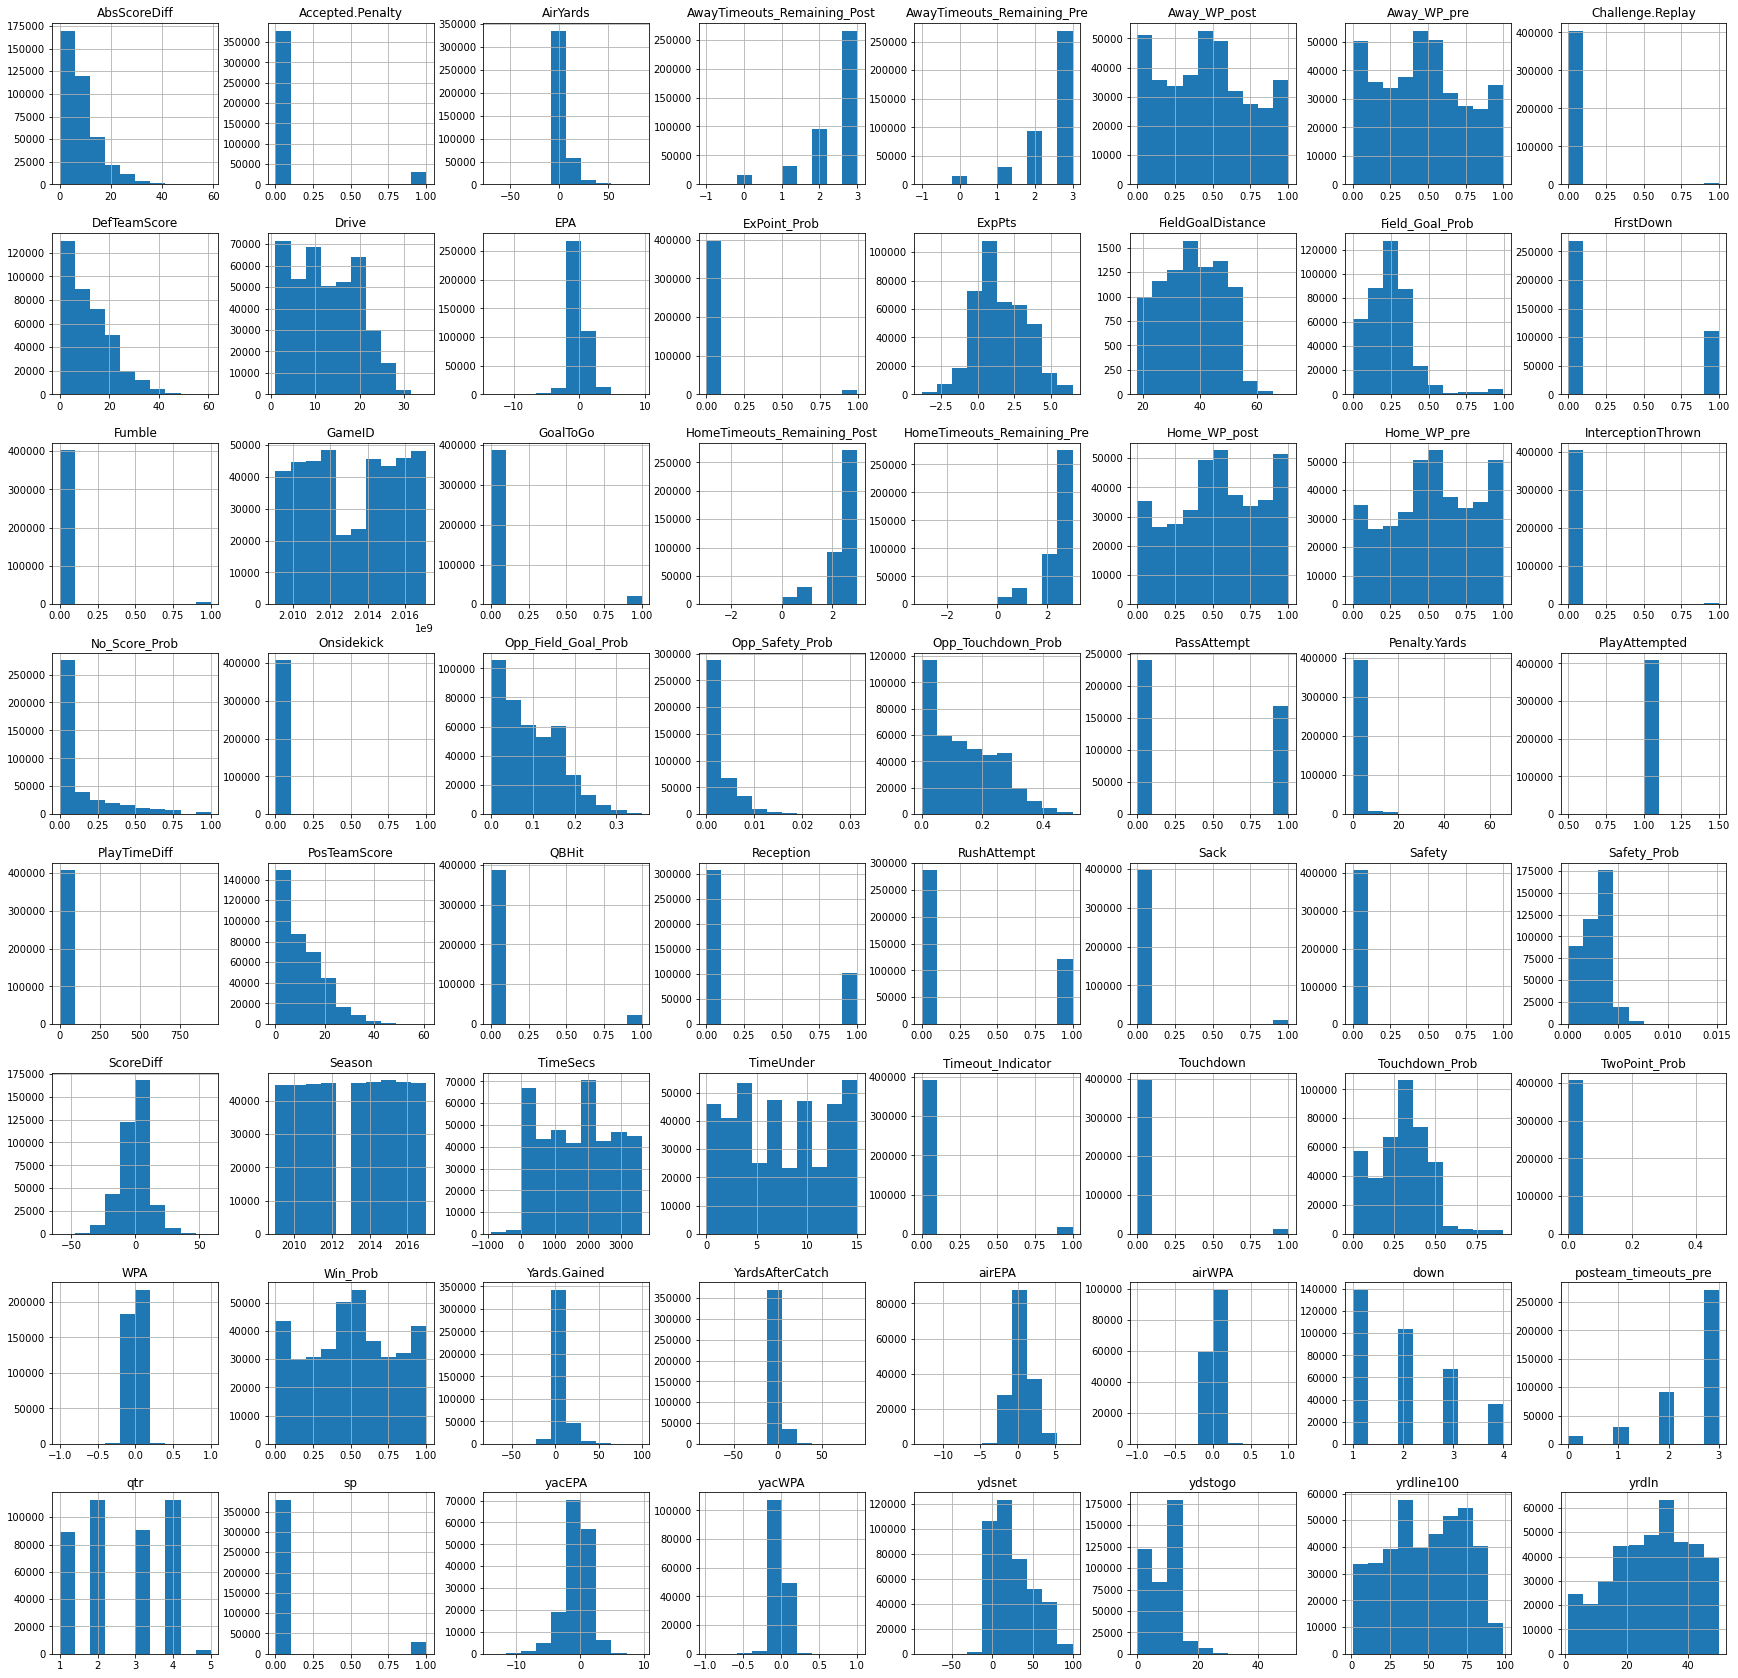

In [128]:
nfl = nfl.sort_index(axis=1)
nfl.hist(figsize=(30,30))
plt.show()


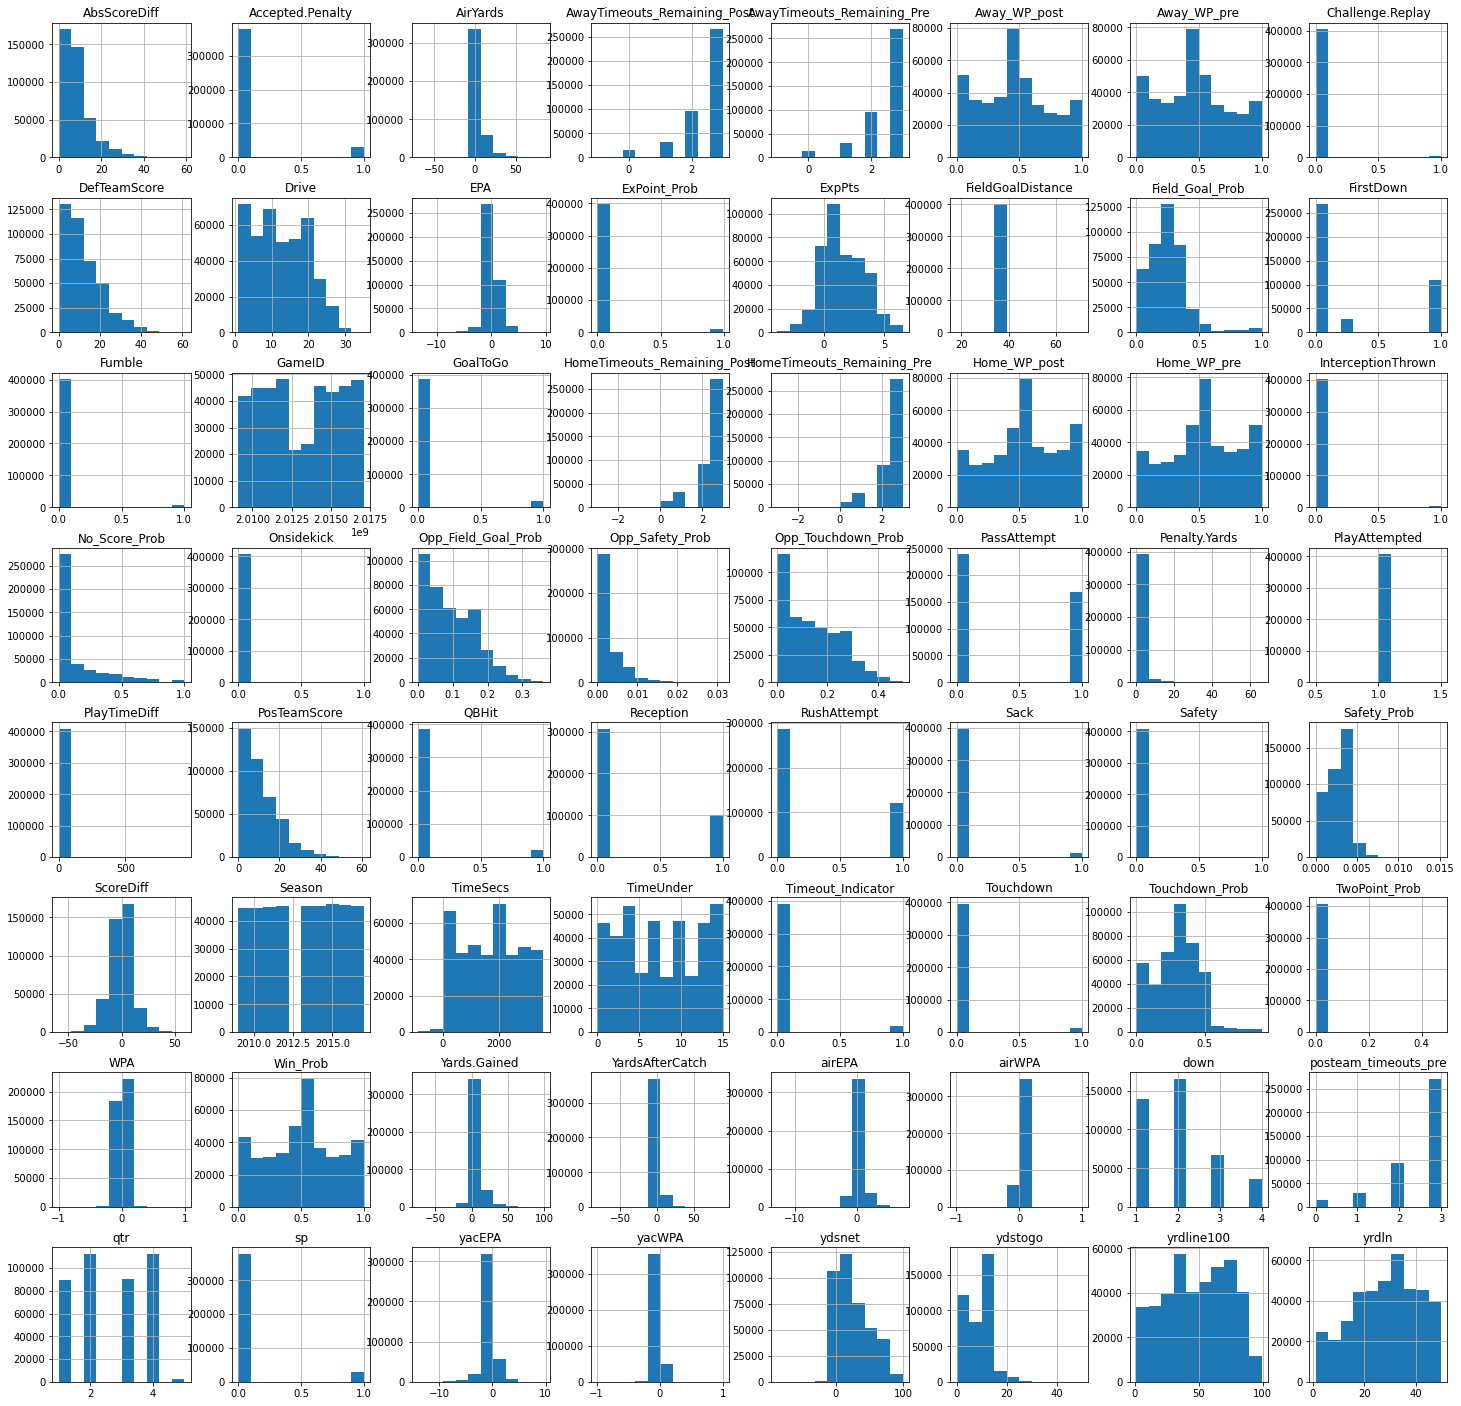

In [129]:
nfl_imputed = nfl_imputed.sort_index(axis=1)
nfl_imputed.hist(figsize=(25,25))
plt.show()

## Q. Can you find further insights into this data? Is any of it business worthy (could have an impact on profits or ROI)? Is any of it humanity worthy (could improve all of our lives)?

In sports settings, we tend to look at each team and a player as a card. We can use the data from the team's perspective, locating which player in each position is doing well in a season, or compared to the last season's dataset. 

For the basic example, a receiver's data can be analyzed by calculating the number of receiving per distance passed. A similar analysis can be done for the runner and passer. It's possible to see if a quarterback has a habit of throwing a ball to the left or the right.

For the deeper analysis, analysis of the opponents can be done by how well the team plays in a different quarter. We can ask questions like, in the 4th down, do they kick or play the ball? Do quarterback tend to throw deep, and has more incomplete pass outcome, why don't we go for sacking the quarterback?

There are so many analysis can be done for sports events to increase the chance of winning when the opponent is analyzed with enough data.